# Diffusion pseudotime

## Library imports

In [1]:
import sys

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import scvelo as scv

sys.path.extend(["../../../", "."])
from paths import DATA_DIR, FIG_DIR  # isort: skip  # noqa: E402

Global seed set to 0


## General settings

In [2]:
sc.settings.verbosity = 2
scv.settings.verbosity = 3

In [3]:
scv.settings.set_figure_params("scvelo", dpi_save=400, dpi=80, transparent=True, fontsize=20, color_map="viridis")

In [4]:
SAVE_FIGURES = False
if SAVE_FIGURES:
    (FIG_DIR / "cytotrace_kernel" / "embryoid_body").mkdir(parents=True, exist_ok=True)

FIGURE_FORMAT = "pdf"

## Data loading

In [5]:
adata = sc.read(DATA_DIR / "embryoid_body" / "embryoid_body.h5ad")
adata

AnnData object with n_obs × n_vars = 31029 × 19122
    obs: 'stage', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

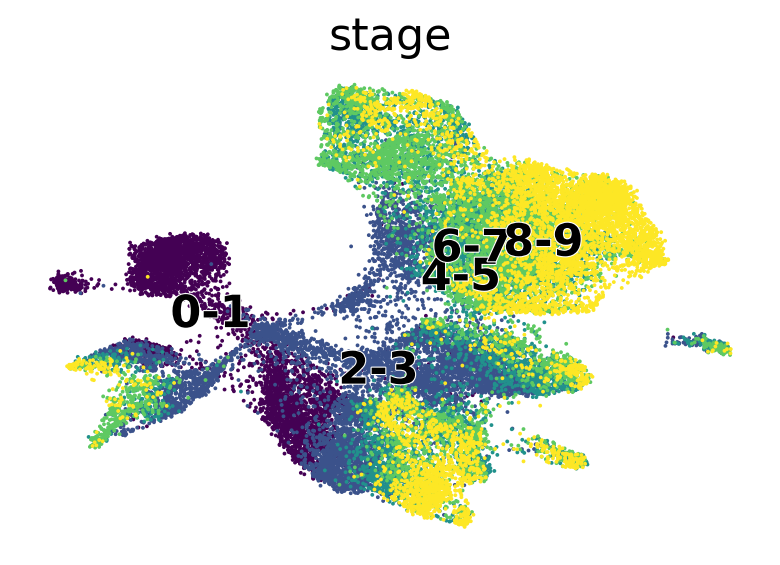

In [6]:
scv.pl.scatter(adata, basis="umap", c="stage", palette="viridis")

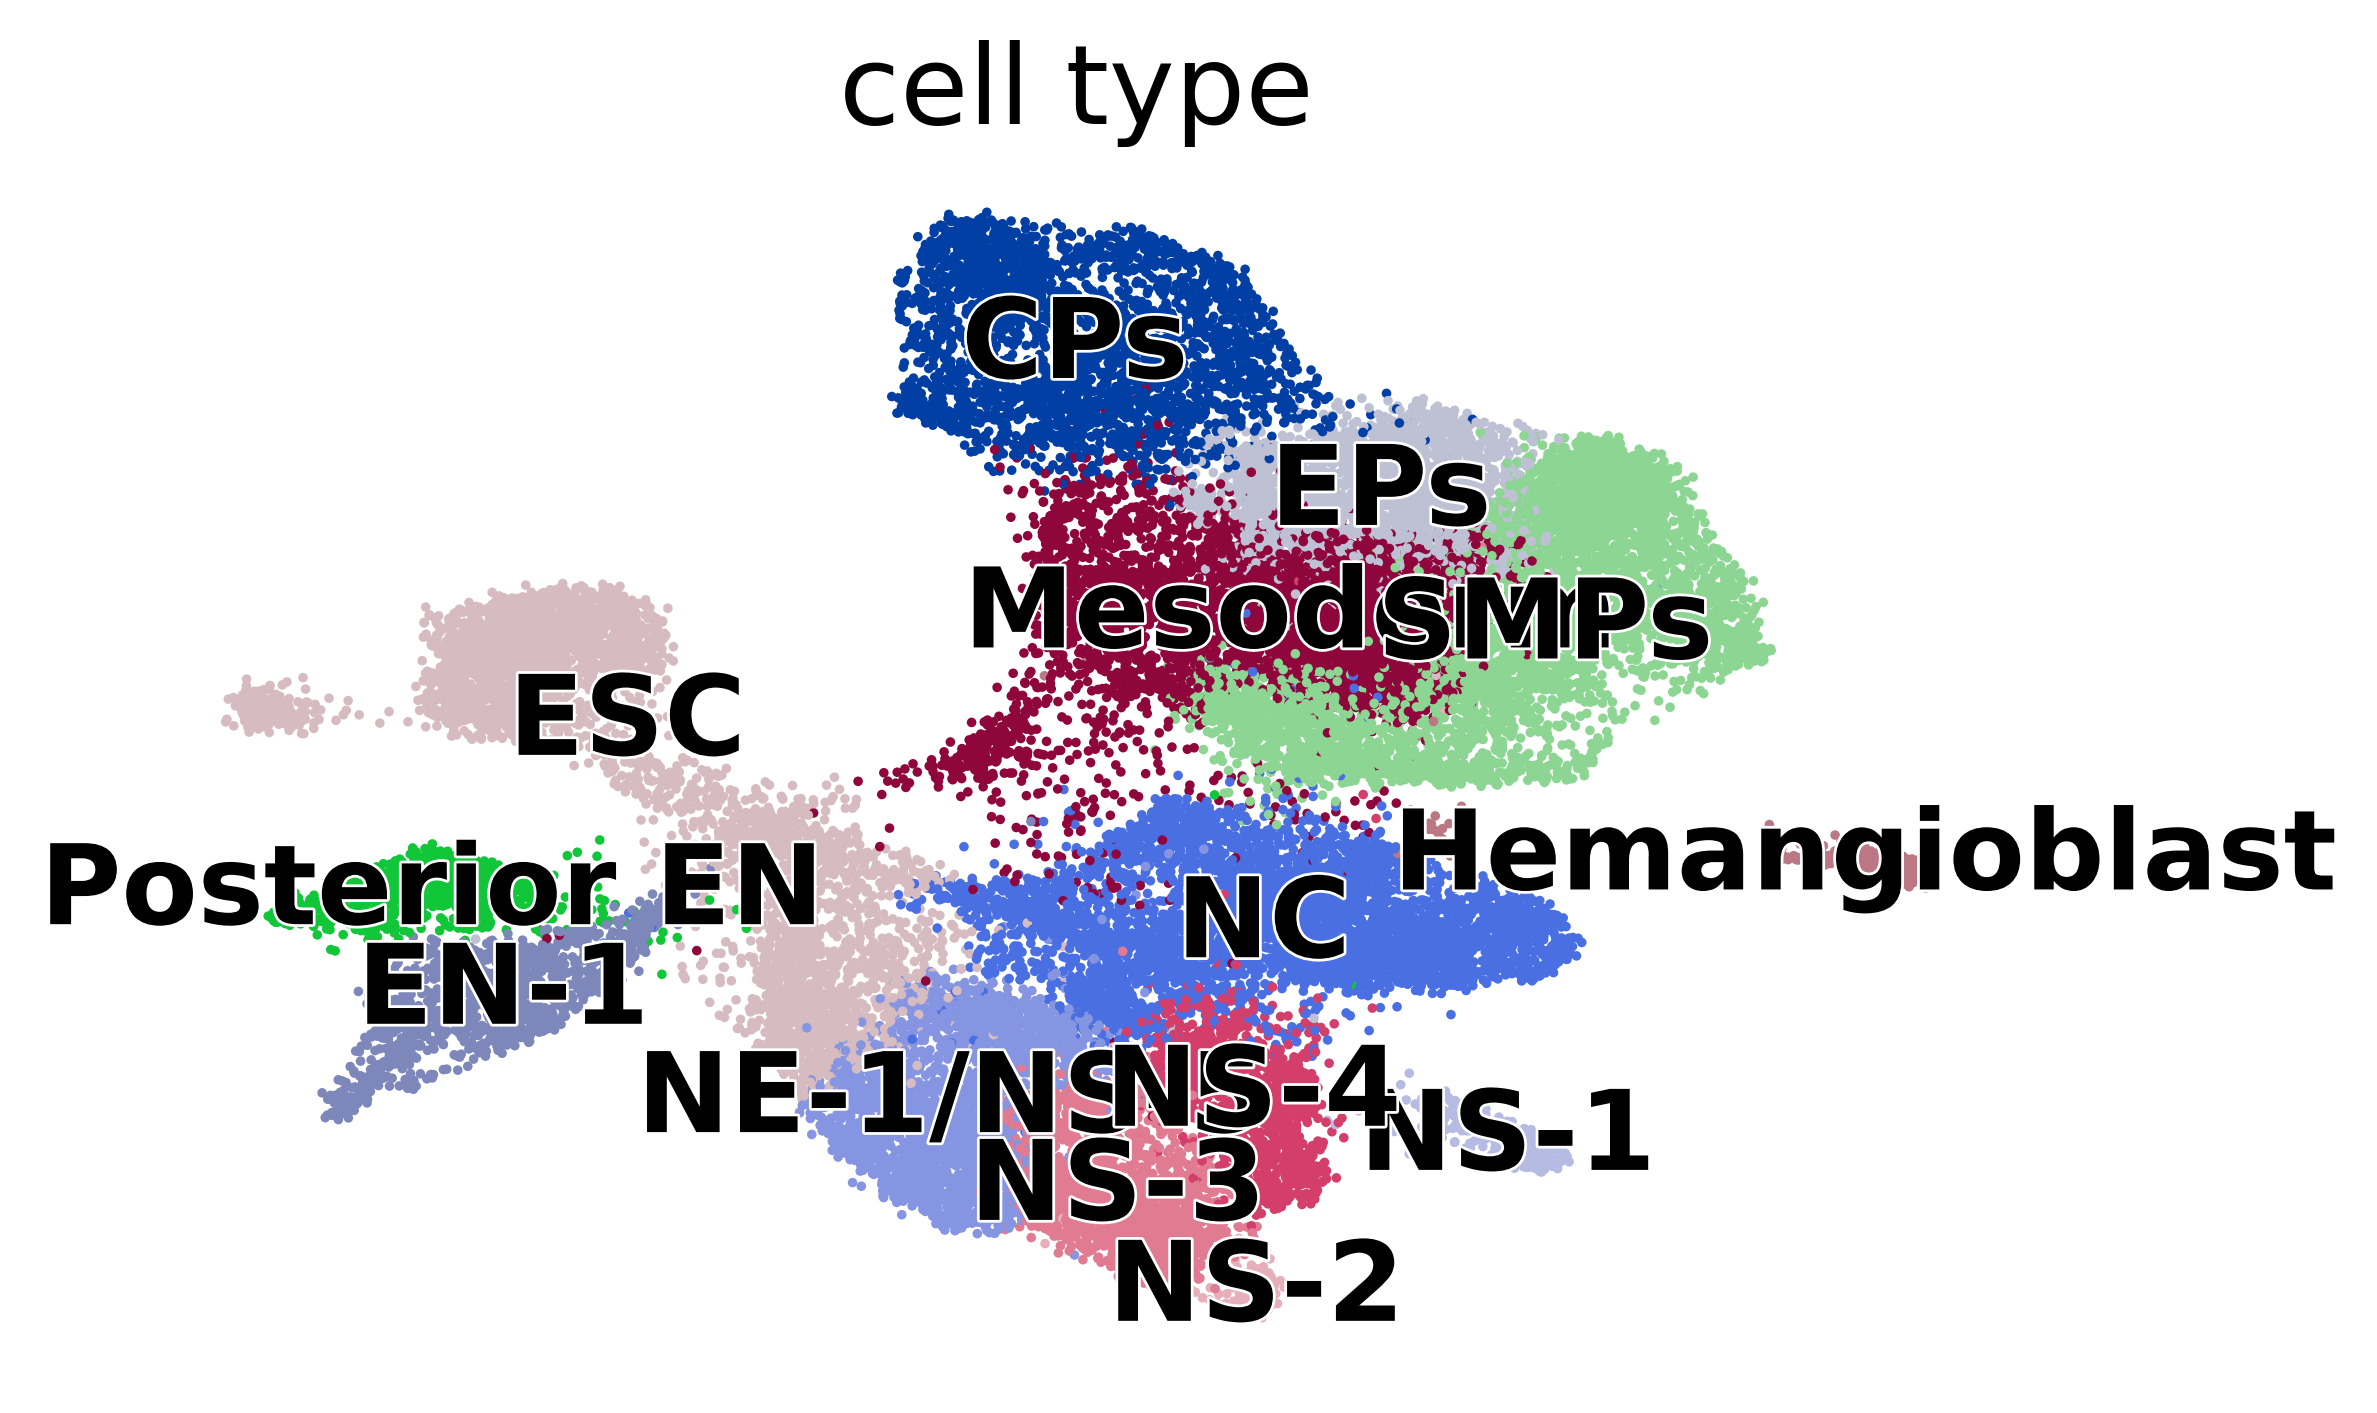

In [7]:
scv.pl.scatter(adata, basis="umap", c="cell_type", dpi=200)

## Pseudotime construction

In [8]:
sc.tl.diffmap(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99504757 0.99104744 0.98765516 0.98503    0.98268324
     0.97936326 0.9733297  0.9698383  0.9653132  0.9609289  0.95480794
     0.9547446  0.9493147  0.9468985 ]
    finished (0:00:01)


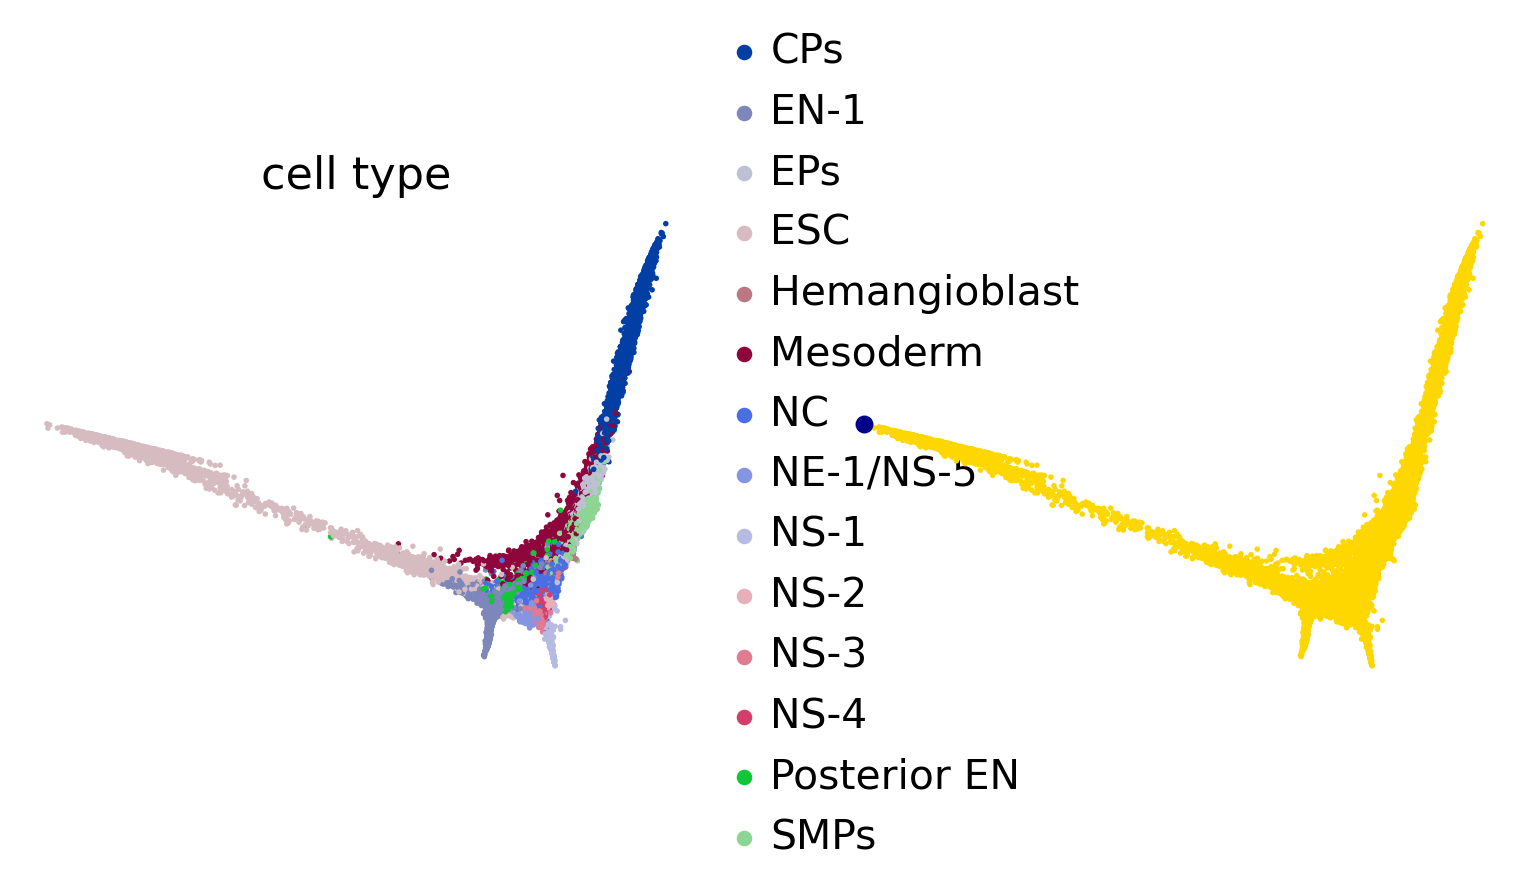

In [9]:
root_idx = 1458  # adata.obsm['X_diffmap'][:, 1].argmin()
scv.pl.scatter(adata, basis="diffmap", color=["cell_type", root_idx], legend_loc="right", components="1, 2", size=25)

In [10]:
adata.uns["iroot"] = root_idx

In [11]:
dpt_pseudotime = sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


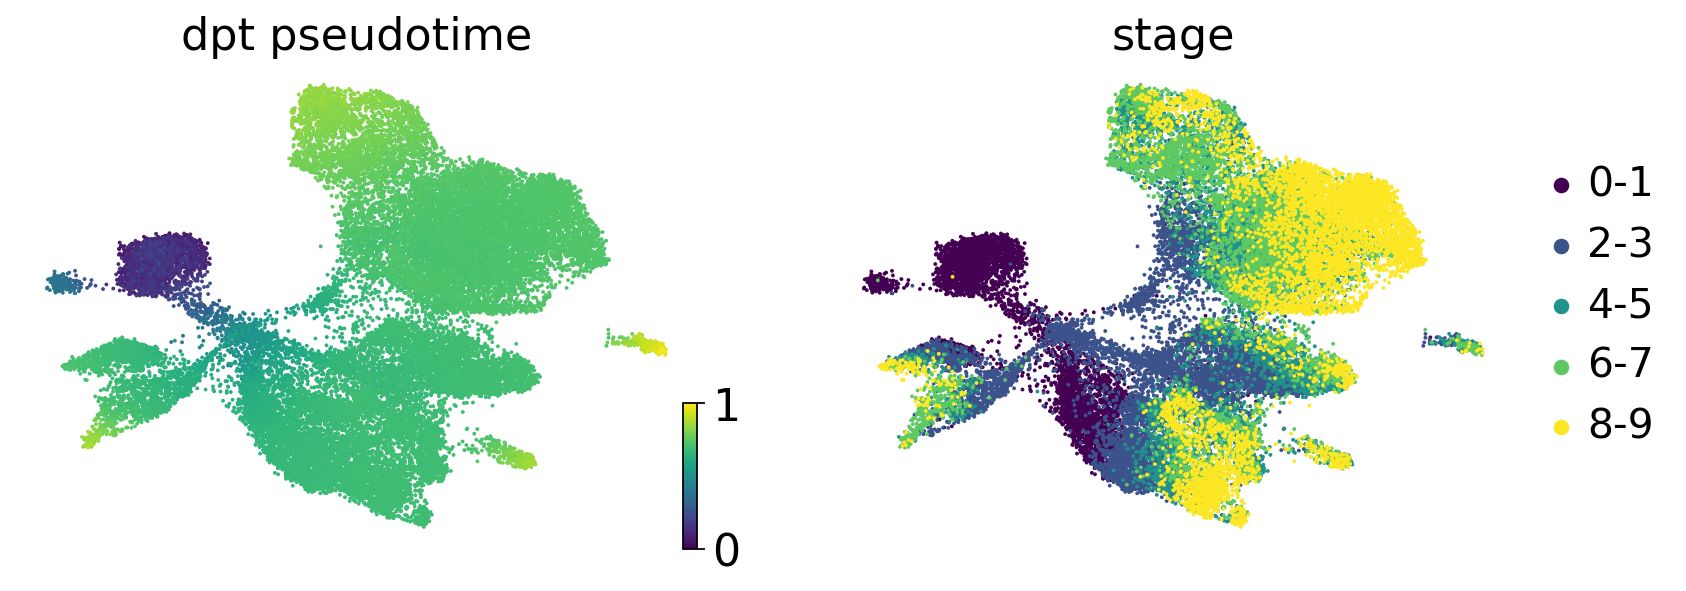

In [12]:
scv.pl.scatter(
    adata,
    c=["dpt_pseudotime", "stage"],
    basis="umap",
    legend_loc="right",
    color_map="viridis",
)

if SAVE_FIGURES:
    fig, ax = plt.subplots(figsize=(6, 4))
    scv.pl.scatter(
        adata, basis="umap", c="dpt_pseudotime", title="", legend_loc=False, colorbar=False, cmap="gnuplot2", ax=ax
    )

    fig.savefig(
        FIG_DIR / "cytotrace_kernel" / "embryoid_body" / f"umap_colored_by_dpt_pseudotime.{FIGURE_FORMAT}",
        format=FIGURE_FORMAT,
        transparent=True,
        bbox_inches="tight",
    )

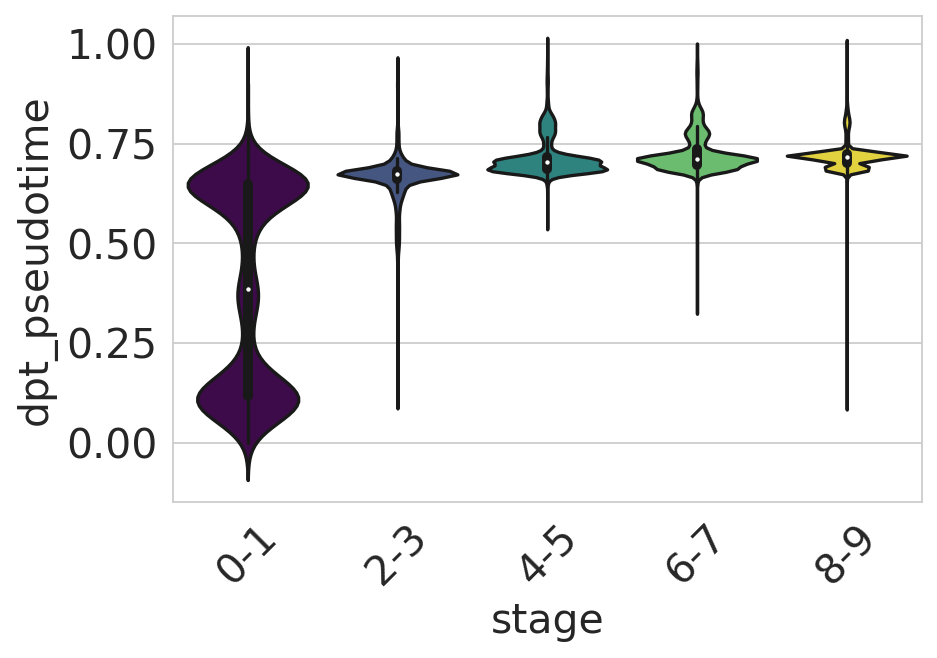

In [13]:
df = adata.obs[["dpt_pseudotime", "stage"]].copy()

sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(
    data=df,
    x="stage",
    y="dpt_pseudotime",
    scale="width",
    palette=["#440154", "#3b528b", "#21918c", "#5ec962", "#fde725"],
    ax=ax,
)

ax.tick_params(axis="x", rotation=45)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.show()

if SAVE_FIGURES:
    ax.set(xlabel=None, xticklabels=[], ylabel=None, yticklabels=[])

    fig.savefig(
        FIG_DIR / "cytotrace_kernel" / "embryoid_body" / f"dpt_vs_stage.{FIGURE_FORMAT}",
        format=FIGURE_FORMAT,
        transparent=True,
        bbox_inches="tight",
    )
sns.reset_orig()